Supervised Machine Learning Model 

In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn import metrics
import numpy as np 

In [3]:
Spawns = pd.read_csv("../Data/pokemon-spawns.csv")
Spawns

,s2_id,s2_token,num,name,lat,lng,encounter_ms,disppear_ms
0,-9185794522947256000,8085808cc6d,13,Weedle,37.793592,-122.408721,1469520187732,1469519919988
1,-9185794529389707000,8085808b51d,16,Pidgey,37.794746,-122.406420,1469520297172,1469519919992
2,-9185794529389707000,8085808b271,41,Zubat,37.794999,-122.404384,1469520709924,1469519919991
3,-9185794082713108000,808580f3587,16,Pidgey,37.795644,-122.407128,-1,1469519920134
4,-9185794076270658000,808580f4b1d,60,Poliwag,37.795592,-122.406331,1469520741876,1469519920153
...,...,...,...,...,...,...,...,...
314100,-9185787356794323000,8085871158f,84,Doduo,37.778626,-122.475958,1469670899836,1469670453557
314101,-9185786935887528000,80858773019,56,Mankey,37.769260,-122.483652,1469671114084,1469670453557
314102,-9185786940182495000,80858772545,29,Nidoran (f),37.768922,-122.483298,1469670572436,1469670453557
314103,-9185787373974192000,8085870d1db,10,Caterpie,37.773062,-122.483387,1469671257676,1469670453556


In [10]:
SpawnsCut= Spawns.drop(['name','s2_id', 's2_token', ], axis=1)

In [11]:
x = SpawnsCut[[ 'num', 'lng', 'disppear_ms']]
y = SpawnsCut['encounter_ms']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(188463, 3) (188463,)
(125642, 3) (125642,)


The x_train datasets, the 188463 rows and 3 columns/ The x_test datasets, the 125642 rows and 3 columns

In [13]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
predictions = lm.predict(x_test)
predictions

array([1.36824693e+12, 1.40199235e+12, 1.36418858e+12, ...,
       1.36964446e+12, 1.36734325e+12, 1.36963354e+12])

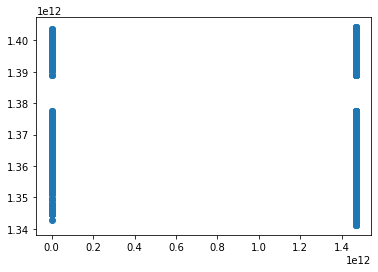

In [15]:
plt.scatter(y_test, predictions)

In [16]:
print("Score:", lm.score(x_test, y_test))

Score: 0.0008971889032032276


In [17]:
metrics.mean_absolute_error(y_test, predictions)

182821032629.38943

In [18]:
metrics.mean_squared_error(y_test, predictions)

1.3371534173711195e+23

In [19]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

365671084086.6583

K-Fold Cross Validation 

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [22]:
kfold =KFold()
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [ 62821  62822  62823 ... 314102 314103 314104], test: [    0     1     2 ... 62818 62819 62820]
train: [     0      1      2 ... 314102 314103 314104], test: [ 62821  62822  62823 ... 125639 125640 125641]
train: [     0      1      2 ... 314102 314103 314104], test: [125642 125643 125644 ... 188460 188461 188462]
train: [     0      1      2 ... 314102 314103 314104], test: [188463 188464 188465 ... 251281 251282 251283]
train: [     0      1      2 ... 251281 251282 251283], test: [251284 251285 251286 ... 314102 314103 314104]


In [23]:
print(cross_val_score(lm, x,y, cv=3))

[-0.00024388 -0.00124701 -0.15268383]
